<a href="https://colab.research.google.com/github/abelm19/Calorie_Predictor/blob/master/Data_Science_Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Project: Calories Burnt Prediction

* Linear Regression
* Decision Tree
* Support Vector Regression
* Lasso Regression
* Random Forest

In [ ]:
#Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Import the csv data
c_data = pd.read_csv('/content/calories.csv')
e_data = pd.read_csv('/content/exercise.csv')

In [ ]:
#merge the two data into one
w_data = pd.merge(c_data, e_data, left_index= True, right_index= True)

In [ ]:
w_data.head()

,User_ID_x,Calories,User_ID_y,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
#Delete unneeded columns
df2 = w_data.drop(['User_ID_x', 'User_ID_y'], axis = 1)
df2.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
#Check any missing values in the data
df2.isnull().sum()

,0
Calories,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [ ]:
df2.shape #number of rows and columns

(15000, 8)

In [ ]:
#Check the typees and other information about the data columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Calories    15000 non-null  float64
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [ ]:
df2.select_dtypes(include = 'number').columns

Index(['Calories', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')

In [ ]:
#Desciptive statistics of the numercal columns
df2.describe()

,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


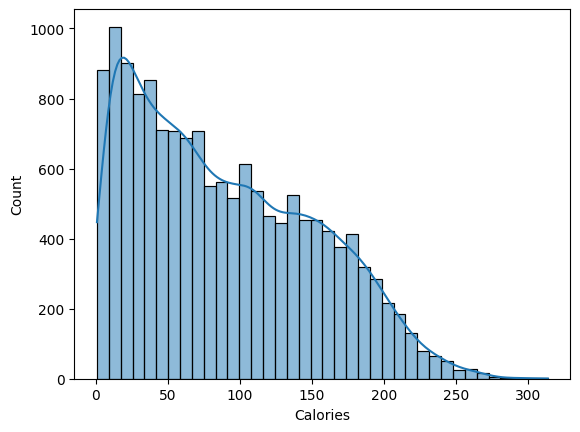

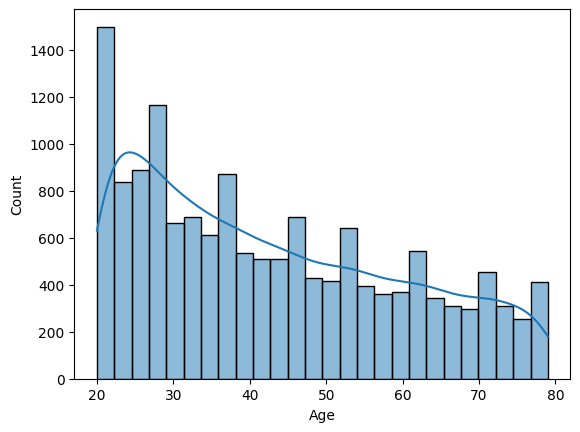

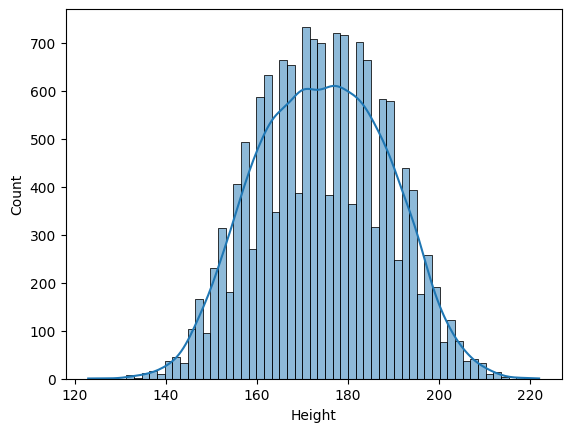

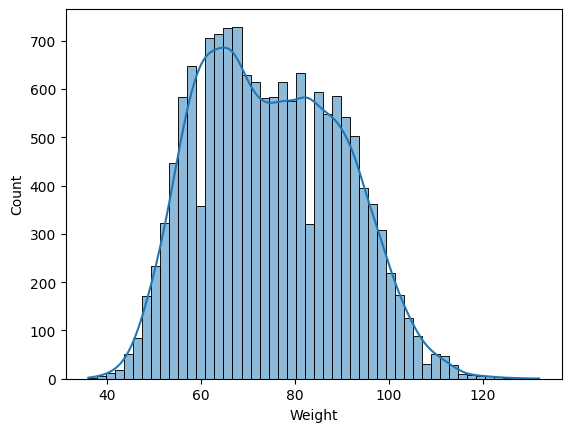

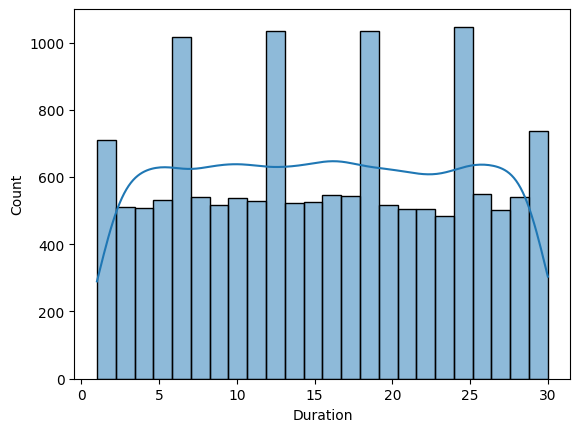

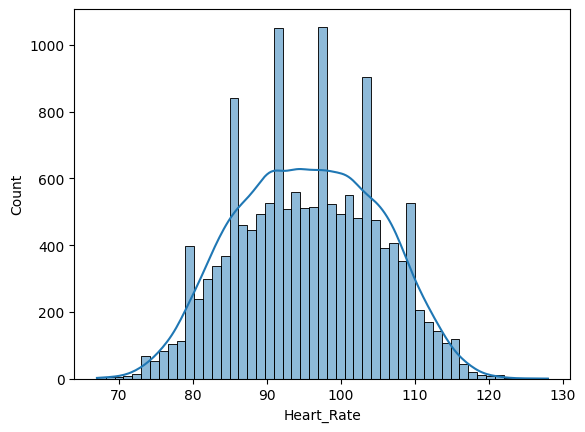

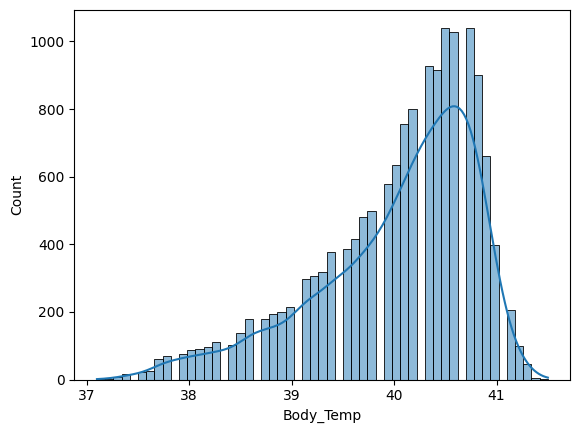

In [ ]:
#Histogram to see the data distribution

for i in df2.select_dtypes(include = 'number').columns:
  sns.histplot(data = df2, x = i, kde = True)
  plt.show()

In [ ]:
df2.select_dtypes(include='number').columns

Index(['Calories', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')

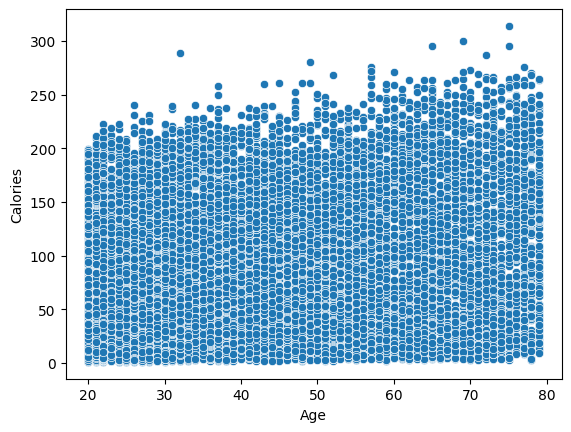

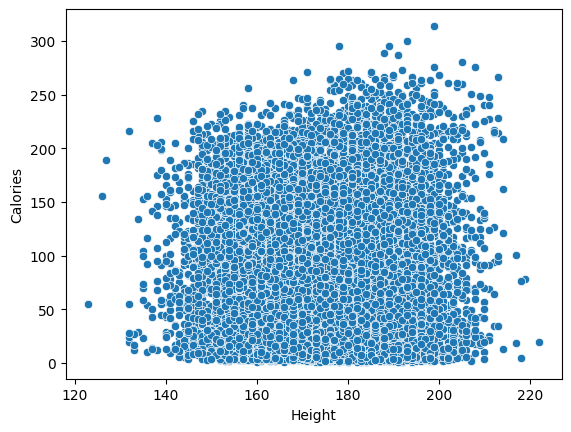

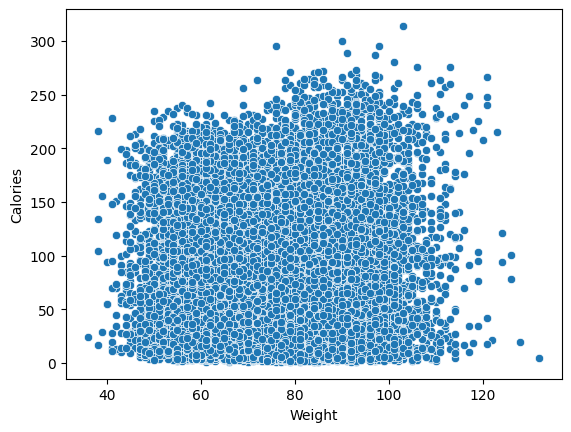

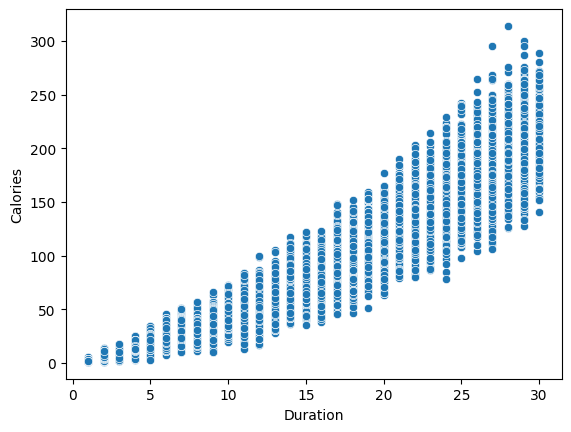

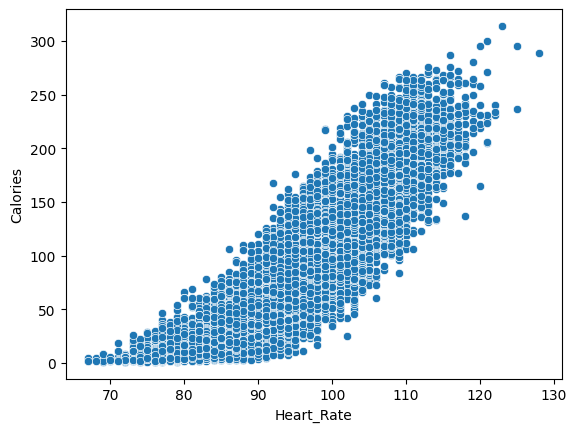

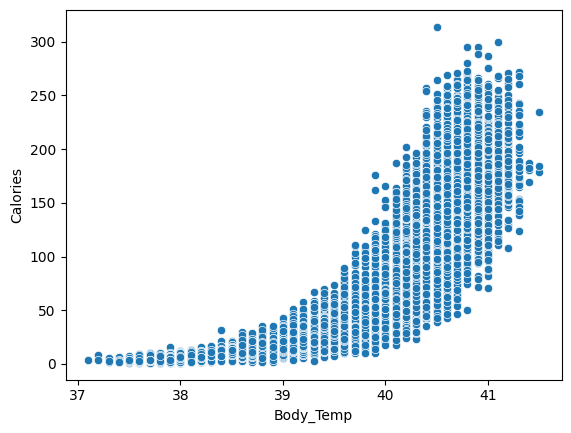

In [ ]:
#Scatter plot to see relationships
for i in [ 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp']:
       sns.scatterplot(data = df2, x = df2[i], y =df2['Calories'])
       plt.show()

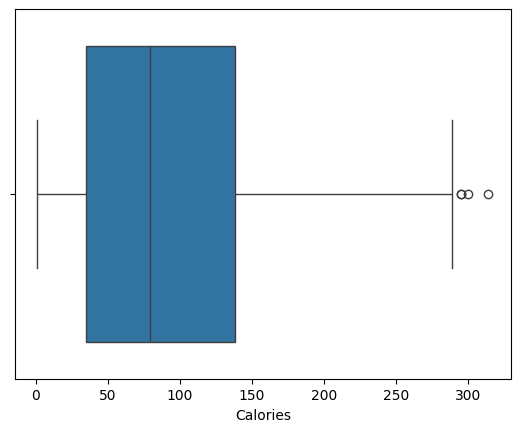

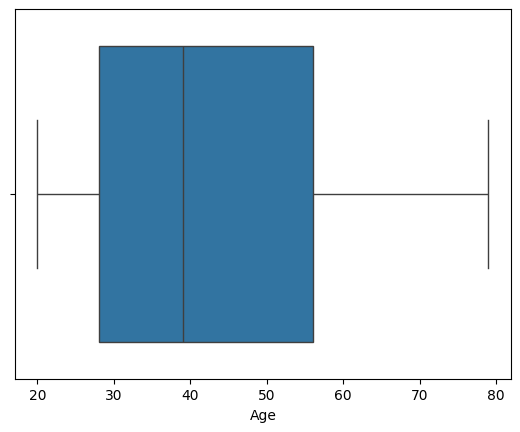

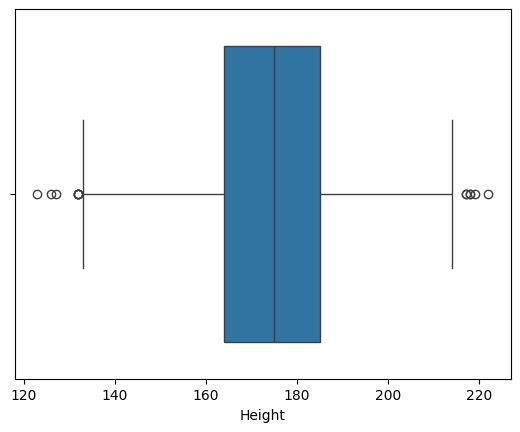

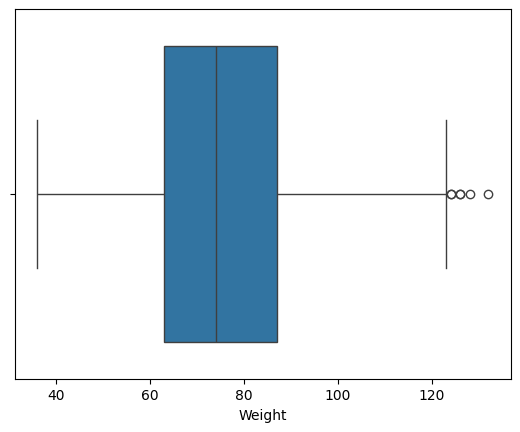

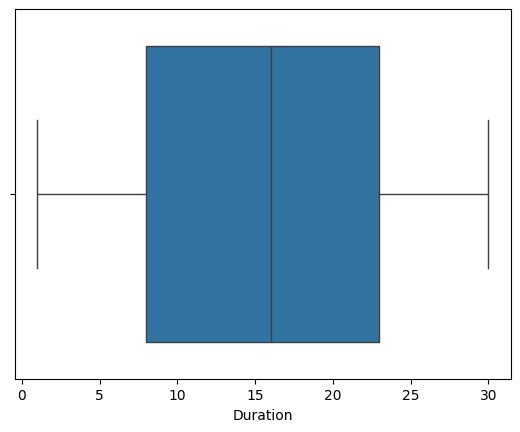

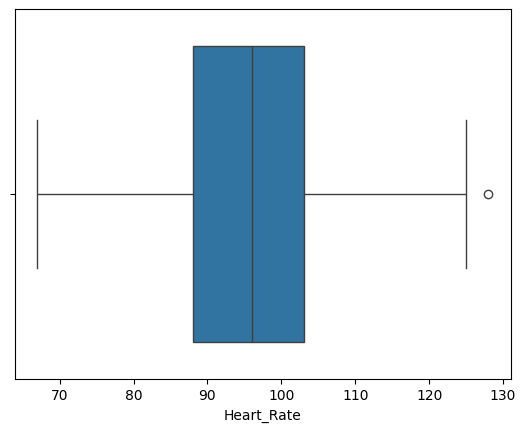

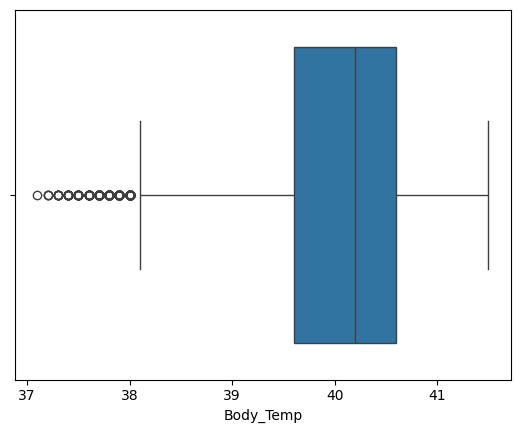

In [ ]:
#box plot to see outliers
for i in df2.select_dtypes(include = 'number').columns:
  sns.boxplot(data = df2, x = i)
  plt.show()

In [ ]:
#Outlier treatment

def wisker(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  lw = q1- 1.5*iqr
  uw = q3 + 1.5*iqr
  return lw,uw

for i in ['Height', 'Weight', 'Body_Temp']:
  lw,uw = wisker(df2[i])
  df2[i] = np.where(df2[i] < lw, lw, df2[i])
  df2[i] = np.where(df2[i] > uw, uw, df2[i])

In [ ]:
print(wisker(df2['Height']))

(132.5, 216.5)


In [ ]:
df2.duplicated().sum()

1

In [ ]:
df2.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()

In [ ]:
df2['Gender'] = model.fit_transform(df2['Gender'])

In [ ]:
df2.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,26.0,1,69,179.0,79.0,5.0,88.0,38.7
3,71.0,0,34,179.0,71.0,13.0,100.0,40.5
4,35.0,0,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
X = df2.drop(['Calories'], axis = 1)
y = df2['Calories']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
13388,1,22,187.0,81.0,15.0,97.0,40.3
6481,1,62,195.0,95.0,13.0,95.0,40.2
1494,0,65,162.0,65.0,12.0,98.0,39.8
2518,1,29,186.0,87.0,20.0,98.0,40.7
9958,0,67,163.0,62.0,30.0,108.0,41.0
...,...,...,...,...,...,...,...
11633,0,34,164.0,62.0,26.0,109.0,40.7
1344,0,58,167.0,64.0,26.0,105.0,40.5
12815,0,61,175.0,71.0,18.0,99.0,40.3
7293,0,22,162.0,64.0,2.0,78.0,38.6


In [ ]:
y_train

,Calories
13388,64.0
6481,81.0
1494,70.0
2518,98.0
9958,210.0
...,...
11633,170.0
1344,169.0
12815,105.0
7293,6.0


In [ ]:
from sklearn import linear_model

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.coef_

array([ -1.37899965,   0.49660306,  -0.19209144,   0.31062867,
         6.71044971,   1.98628817, -18.16397137])

In [ ]:
reg.predict([[0,35,177,95,30,150,38]]) #Age	Height	Weight	Duration	Heart_Rate	Body_Temp	Gender

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([334.28431373])

In [ ]:
reg.score(X_test,y_test)

0.9663576611046629

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(reg, X, y, cv=cv)

array([0.96912355, 0.96575765, 0.96660548, 0.96655314, 0.96870992])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': reg,
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'random_forest_regressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators' : [10,20,30]
            }
        },
        'decision_tree': {
            'model': SVR(),
            'params': {
                'C' : [5,10,20],
                'Kernel': ['rbf','linear']

            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,linear_regression,0.967350,{'fit_intercept': True}
1,lasso,0.964377,"{'alpha': 1, 'selection': 'cyclic'}"
2,random_forest_regressor,0.997629,{'n_estimators': 30}
3,decision_tree,0.993052,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 30)

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [ ]:
rf.predict([[0,35,177,95,20,140,37]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([142.93333333])

In [ ]:
import pickle
with open('calorie_pred.pickle','wb') as f:
    pickle.dump(rf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))